#Задание_№1
-Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом. -Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д. -Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
from pymystem3 import Mystem
#открываем текст 
with open('Harry_Potter_and_the_Sorcerers_Stone.txt','r', encoding='utf-8') as f:
    text = f.read()
#очищаем от пунктуации
text_free = [w.strip("’!\"#$%&'()*+,./:;<=>?@[\]^_`{|}~„“”«»†*—/\-”—?,") for w in text.split()] 
 
#приводим к нижнему регистру
text_free = ' '.join(text_free).lower()

In [3]:
text_free[:10]

'chapter on'

In [4]:
#лемаищируем и пишем в новый файл-переменную x
text = text_free
from nltk import WordNetLemmatizer
wnl = WordNetLemmatizer()
x = wnl.lemmatize(text_free)
with open ('Harry_Potter_lemmas.txt', 'w', encoding = 'utf-8') as f:
    f.write(x)

In [5]:
#частота лемм
from collections import Counter
counts = Counter(text.split())

print(counts.most_common(5))

[('the', 3603), ('and', 1870), ('to', 1845), ('a', 1667), ('he', 1497)]


In [6]:
#проверила сортировку на всякий случай
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
print(sorted_counts[:5])

[('the', 3603), ('and', 1870), ('to', 1845), ('a', 1667), ('he', 1497)]


In [7]:
#выводим абсолютную частоту
def get_relative_frequency(words):
    absolute_frequency = list(Counter(words).items())
#Сортируем по убыванию 
    absolute_frequency.sort(reverse=True, key=lambda x: x[1])
#считаем слова
    count = len(words)
# относительная частота 
    return [(w, c / count) for w, c in absolute_frequency]

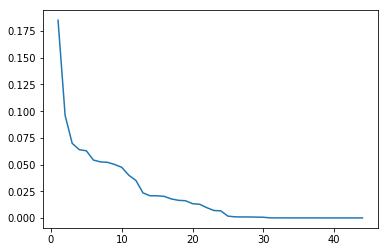

In [9]:

# Проверяем закон Ципфа

import matplotlib.pyplot as plt

relative_frequency = get_relative_frequency(x)
plt.plot(range(1, len(relative_frequency) + 1), 
         [f for w, f in relative_frequency]) 
plt.show()

In [10]:
#очищаем текст от стоп.слов
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sw = stopwords.words('english')
h_filtered = [w for w in word_tokenize(x) if w not in sw]
print(h_filtered[:30])

['chapter', 'one', 'boy', 'lived', 'mr', 'mrs', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank', 'much', 'last', 'people', "'d", 'expect', 'involved', 'anything', 'strange', 'mysterious', "n't", 'hold', 'nonsense', 'mr', 'dursley']


In [11]:
# Сортируем текст (h_filtered)
h_firty = {}
counts = Counter(h_filtered)

for k, v in counts.items():
    h_firty[k] = v
    

h_firty = sorted(h_firty.items(), key=lambda x: x[1], reverse=True)
print(h_firty[:30])

[('harry', 1305), ("'s", 995), ("n't", 827), ('said', 794), ('ron', 427), ('hagrid', 366), ('could', 301), ("'d", 267), ('hermione', 267), ('back', 257), ('one', 250), ('got', 204), ('get', 192), ('like', 188), ('know', 185), ('see', 177), ("'ve", 176), ('professor', 172), ('looked', 169), ('snape', 167), ("'ll", 160), ('dumbledore', 156), ('would', 153), ('around', 141), ('dudley', 137), ("'re", 135), ('going', 134), ('go', 130), ('something', 128), ('think', 121)]


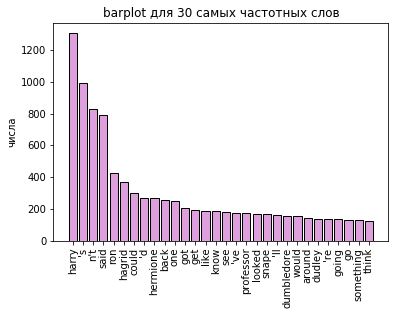

In [13]:
X = range(30)
Y = [word[1] for word in h_firty]
Z = [word[0] for word in h_firty] 
plt.bar(X, Y[:30], color ='plum', edgecolor='black')
plt.title('barplot для 30 самых частотных слов')
plt.ylabel('числа')
plt.xticks(X, Z[:30], rotation=90)
plt.show()